# Analysis of IMDB Data

We will analyze a subset of IMDB's actors, genres, movie actors, and movie ratings data. This dataset comes to us from Kaggle (https://www.kaggle.com/datasets/ashirwadsangwan/imdb-dataset) although we have taken steps to pull this data into a publis s3 bucket: 

* s3://cis9760-lecture9-movieanalysis/name.basics.tsv ---> (actors)
* s3://cis9760-lecture9-movieanalysis/title.basics.tsv ---> (genres)
* s3://cis9760-lecture9-movieanalysis/title.principals.tsv ---> (movie actors)
* s3://cis9760-lecture9-movieanalysis/title.ratings.tsv ---> (movie ratings)

# Content

**<br />name.basics.tsv.gz – Contains the following information for names:**
<br />nconst (string) - alphanumeric unique identifier of the name/person.
<br />primaryName (string)– name by which the person is most often credited.
<br />birthYear – in YYYY format.
<br />deathYear – in YYYY format if applicable, else .
<br />primaryProfession (array of strings)– the top-3 professions of the person.
<br />knownForTitles (array of tconsts) – titles the person is known for.
<br/><br/>
**<br />title.basics.tsv.gz - Contains the following information for titles:**
<br />tconst (string) - alphanumeric unique identifier of the title.
<br />titleType (string) – the type/format of the title (e.g. movie, short, tvseries, tvepisode, video, etc).
<br />primaryTitle (string) – the more popular title / the title used by the filmmakers on promotional materials at the point of release.
<br />originalTitle (string) - original title, in the original language.
<br />isAdult (boolean) - 0: non-adult title; 1: adult title.
<br />startYear (YYYY) – represents the release year of a title. In the case of TV Series, it is the series start year.
<br />endYear (YYYY) – TV Series end year. for all other title types.
<br />runtimeMinutes – primary runtime of the title, in minutes.
<br />genres (string array) – includes up to three genres associated with the title.
<br/><br/>
**<br />title.principals.tsv – Contains the principal cast/crew for titles:**
<br />tconst (string) - alphanumeric unique identifier of the title.
<br />ordering (integer) – a number to uniquely identify rows for a given titleId.
<br />nconst (string) - alphanumeric unique identifier of the name/person.
<br />category (string) - the category of job that person was in.
<br />job (string) - the specific job title if applicable, else.
<br />characters (string) - the name of the character played if applicable, else.
<br/><br/>
**<br />title.ratings.tsv.gz – Contains the IMDb rating and votes information for titles:**
<br />tconst (string) - alphanumeric unique identifier of the title.
<br />averageRating – weighted average of all the individual user ratings.
<br />numVotes - number of votes the title has received.

# PART 1 - Installation and Initial Setup

Begin by installing the necessary libraries that you may need to conduct your analysis. At the very least, you must install pandas and matplotlib

In [1]:
%%info

Let's install the necessary packages here

In [2]:
sc.list_packages()
sc.install_pypi_package("pandas==1.0.5")
sc.install_pypi_package("matplotlib==3.2.1")

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,User,Current session?
7,application_1701365468221_0008,pyspark,idle,Link,Link,None,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Package                    Version
-------------------------- ----------
aws-cfn-bootstrap          2.0
beautifulsoup4             4.9.3
boto                       2.49.0
click                      8.1.7
docutils                   0.14
jmespath                   1.0.1
joblib                     1.3.2
lockfile                   0.11.0
lxml                       4.9.3
mysqlclient                1.4.2
nltk                       3.8.1
nose                       1.3.4
numpy                      1.20.0
pip                        20.2.2
py-dateutil                2.2
pystache                   0.5.4
python-daemon              2.2.3
python37-sagemaker-pyspark 1.4.2
pytz                       2023.3
PyYAML                     5.4.1
regex                      2021.11.10
setuptools                 28.8.0
simplejson                 3.2.0
six                        1.13.0
tqdm                       4.66.1
wheel                      0.29.0
windmill                   1.6






Now, import the installed packages from the previous block below.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyspark.sql.functions import (
avg,
mean, 
count, 
sum, 
col,
max, 
min,
lit,
explode,
split,
format_number,
first,
approx_count_distinct, 
collect_set, 
countDistinct)
from pyspark.sql.types import (
StructType,
StructField,
StringType,
IntegerType,
ArrayType
)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

# Loading Data

Load all data from S3 into a Spark dataframe object 

In [4]:
actors = spark.read.csv('s3://cis9760-lecture9-movieanalysis/name.basics.tsv', sep=r'\t', header=True)
genres = spark.read.csv('s3://cis9760-lecture9-movieanalysis/title.basics.tsv', sep=r'\t', header=True)
movie_actors = spark.read.csv('s3://cis9760-lecture9-movieanalysis/title.principals.tsv', sep=r'\t', header=True)
movie_ratings = spark.read.csv('s3://cis9760-lecture9-movieanalysis/title.ratings.tsv', sep=r'\t', header=True)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

## Actors

Display the schema below:

In [5]:
actors.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- nconst: string (nullable = true)
 |-- primaryName: string (nullable = true)
 |-- birthYear: string (nullable = true)
 |-- deathYear: string (nullable = true)
 |-- primaryProfession: string (nullable = true)
 |-- knownForTitles: string (nullable = true)

Display the first 5 rows with the following columns:

* `primaryName`
* `birthYear`
* `deathYear`
* `knownForTitles`

In [6]:
actors.select('primaryName', 'birthYear', 'deathYear', 'knownForTitles').show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------------+---------+---------+--------------------+
|    primaryName|birthYear|deathYear|      knownForTitles|
+---------------+---------+---------+--------------------+
|   Fred Astaire|     1899|     1987|tt0050419,tt00531...|
|  Lauren Bacall|     1924|     2014|tt0071877,tt01170...|
|Brigitte Bardot|     1934|       \N|tt0054452,tt00491...|
|   John Belushi|     1949|     1982|tt0077975,tt00725...|
| Ingmar Bergman|     1918|     2007|tt0069467,tt00509...|
+---------------+---------+---------+--------------------+
only showing top 5 rows

## Genres

Display the first 10 rows with the following columns:
    
* `titleType`
* `primaryTitle`
* `genres`

In [7]:
genres.select('titleType', 'primaryTitle', 'genres').show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+--------------------+--------------------+
|titleType|        primaryTitle|              genres|
+---------+--------------------+--------------------+
|    short|          Carmencita|   Documentary,Short|
|    short|Le clown et ses c...|     Animation,Short|
|    short|      Pauvre Pierrot|Animation,Comedy,...|
|    short|         Un bon bock|     Animation,Short|
|    short|    Blacksmith Scene|        Comedy,Short|
|    short|   Chinese Opium Den|               Short|
|    short|Corbett and Court...|         Short,Sport|
|    short|Edison Kinetoscop...|   Documentary,Short|
|    movie|          Miss Jerry|             Romance|
|    short| Exiting the Factory|   Documentary,Short|
+---------+--------------------+--------------------+
only showing top 10 rows

Display the unique categories below:

In [8]:
genres.select('titleType').distinct().show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------------+
|   titleType|
+------------+
|    tvSeries|
|tvMiniSeries|
|       movie|
|   videoGame|
|   tvSpecial|
|       video|
|     tvMovie|
|   tvEpisode|
|     tvShort|
|       short|
+------------+

Display the schema below:

In [9]:
genres.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- tconst: string (nullable = true)
 |-- titleType: string (nullable = true)
 |-- primaryTitle: string (nullable = true)
 |-- originalTitle: string (nullable = true)
 |-- isAdult: string (nullable = true)
 |-- startYear: string (nullable = true)
 |-- endYear: string (nullable = true)
 |-- runtimeMinutes: string (nullable = true)
 |-- genres: string (nullable = true)

## Movie Actors

Display the schema below:

In [10]:
movie_actors.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- tconst: string (nullable = true)
 |-- ordering: string (nullable = true)
 |-- nconst: string (nullable = true)
 |-- category: string (nullable = true)
 |-- job: string (nullable = true)
 |-- characters: string (nullable = true)

Display the first 10 rows below

In [11]:
movie_actors.show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+--------+---------+---------------+--------------------+-----------+
|   tconst|ordering|   nconst|       category|                 job| characters|
+---------+--------+---------+---------------+--------------------+-----------+
|tt0000001|       1|nm1588970|           self|                  \N|["Herself"]|
|tt0000001|       2|nm0005690|       director|                  \N|         \N|
|tt0000001|       3|nm0374658|cinematographer|director of photo...|         \N|
|tt0000002|       1|nm0721526|       director|                  \N|         \N|
|tt0000002|       2|nm1335271|       composer|                  \N|         \N|
|tt0000003|       1|nm0721526|       director|                  \N|         \N|
|tt0000003|       2|nm5442194|       producer|            producer|         \N|
|tt0000003|       3|nm1335271|       composer|                  \N|         \N|
|tt0000003|       4|nm5442200|         editor|                  \N|         \N|
|tt0000004|       1|nm0721526|       dir

## Movie Ratings

Display the schema below:

In [12]:
movie_ratings.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- tconst: string (nullable = true)
 |-- averageRating: string (nullable = true)
 |-- numVotes: string (nullable = true)

Display the first 10 rows in a descending order by the number of votes

In [13]:
movie_ratings.orderBy(col("numVotes").desc()).show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+-------------+--------+
|   tconst|averageRating|numVotes|
+---------+-------------+--------+
|tt7430722|          6.8|    9999|
|tt4445154|          8.1|    9997|
|tt2229907|          6.3|    9996|
|tt0294097|          8.0|    9994|
|tt0264734|          6.5|    9993|
|tt2032572|          5.2|    9991|
|tt8860450|          6.3|    9991|
|tt0696544|          8.2|     999|
|tt2171651|          7.8|     999|
|tt0664505|          8.4|     999|
+---------+-------------+--------+
only showing top 10 rows

# Overview of Data

Display the number of rows and columns in each dataFrame object.

In [14]:
print(f"Number of columns in Actors table: {len(actors.columns)}")
print(f"Number of rows in Actors table: {actors.count()}\n")

print(f"Number of columns in Genres table: {len(genres.columns)}")
print(f"Number of rows in Genres table: {genres.count()}\n")

print(f"Number of columns in Movie Actors table: {len(movie_actors.columns)}")
print(f"Number of rows in Movie Actors table: {movie_actors.count()}\n")

print(f"Number of columns in Movie Ratings table: {len(movie_ratings.columns)}")
print(f"Number of rows in Movie Ratings table: {movie_ratings.count()}\n")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Number of columns in Actors table: 6
Number of rows in Actors table: 9706922

Number of columns in Genres table: 9
Number of rows in Genres table: 6321302

Number of columns in Movie Actors table: 6
Number of rows in Movie Actors table: 36468817

Number of columns in Movie Ratings table: 3
Number of rows in Movie Ratings table: 993153

# PART 2 - Analyzing Genres

Let's now answer this question: how many unique genres are represented in this dataset?

Essentially, we have the genres per movie as a list - this is useful to quickly see what each movie might be represented as but it is difficult to easily answer questions such as:

* How many movies are categorized as Comedy, for instance?
* What are the top 20 most popular genres available?

## Association Table

We need to "break out" these genres from the tconst? One common approach to take is to build an association table mapping a single tconst multiple times to each distinct genre.

For instance, given the following:


| tconst   | titleType  |genres |
|----------|------------|-------|
| abcd123  | XXX        |a,b,c  |

We would like to derive something like:

| tconst   |  titleType |genre |
|----------|------------|------|
| abcd123  | XXX        |a     |
| abcd123  | XXX        |b     |
| abcd123  | XXX        |c     |


What this does is allow us to then perform a myriad of rollups and other analysis on this association table which can aid us in answering the questions asked above.

Implement the code necessary to derive the table described from the data set

In [15]:
genres.select('tconst', 'titleType', 'genres').show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+---------+--------------------+
|   tconst|titleType|              genres|
+---------+---------+--------------------+
|tt0000001|    short|   Documentary,Short|
|tt0000002|    short|     Animation,Short|
|tt0000003|    short|Animation,Comedy,...|
|tt0000004|    short|     Animation,Short|
|tt0000005|    short|        Comedy,Short|
+---------+---------+--------------------+
only showing top 5 rows

Display the first 10 rows of your association table below

In [16]:
genres_exploded = genres.withColumn('genre', explode(split('genres', ',')))                         
genres_exploded.select('tconst', 'titleType', 'genre').show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+---------+-----------+
|   tconst|titleType|      genre|
+---------+---------+-----------+
|tt0000001|    short|Documentary|
|tt0000001|    short|      Short|
|tt0000002|    short|  Animation|
|tt0000002|    short|      Short|
|tt0000003|    short|  Animation|
|tt0000003|    short|     Comedy|
|tt0000003|    short|    Romance|
|tt0000004|    short|  Animation|
|tt0000004|    short|      Short|
|tt0000005|    short|     Comedy|
+---------+---------+-----------+
only showing top 10 rows

## Total Unique Genres

**What is the total number of unique genres available in the movie category?**

In [17]:
genres_exploded.select(countDistinct('genre')).collect()[0][0]

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

29

**What are the unique genres available?**

In [18]:
genres_exploded.select('genre').distinct().show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------+
|      genre|
+-----------+
|    Mystery|
|    Musical|
|      Sport|
|     Action|
|  Talk-Show|
|    Romance|
|   Thriller|
|         \N|
| Reality-TV|
|     Family|
|    Fantasy|
|    History|
|  Animation|
|  Film-Noir|
|      Short|
|     Sci-Fi|
|       News|
|      Drama|
|Documentary|
|    Western|
+-----------+
only showing top 20 rows

**Oops! Something is off!**

In [19]:
genres_exploded_cleaned = genres_exploded.filter(col('genre')!= "\\N")
genres_exploded_cleaned.select('genre').distinct().show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------+
|      genre|
+-----------+
|    Mystery|
|    Musical|
|      Sport|
|     Action|
|  Talk-Show|
|    Romance|
|   Thriller|
| Reality-TV|
|     Family|
|    Fantasy|
|    History|
|  Animation|
|  Film-Noir|
|      Short|
|     Sci-Fi|
|       News|
|      Drama|
|Documentary|
|    Western|
|     Comedy|
+-----------+
only showing top 20 rows

In [20]:
genres_exploded_cleaned.select(countDistinct('genre')).collect()[0][0]

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

28

## Top Genres by Movies

Now let's find the highest rated genres in this dataset by rolling up genres.

### Average Rating / Genre

So now, let's unroll our distinct count a bit and display the per average rating value of per genre.

The expected output should be:

| genre | averageRating |
|-------------|------------|
| a     | 8.5         |
| b     | 6.3         |
| c     | 7.2         |

Or something to that effect.

First, let's join our two dataframes (movie ratings and genres) by tconst

In [21]:
joined_ratings_genres = movie_ratings.join(genres_exploded_cleaned.filter(genres_exploded_cleaned.titleType == 'movie'),'tconst')
joined_ratings_genres.select('genre', 'averageRating').show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+-------------+
|    genre|averageRating|
+---------+-------------+
|    Drama|          4.2|
|    Drama|          4.2|
|Biography|          4.1|
|    Drama|          4.1|
|  History|          4.1|
|    Drama|          5.7|
|    Drama|          4.6|
|  History|          4.6|
|Biography|          6.3|
|    Drama|          6.3|
+---------+-------------+
only showing top 10 rows

Now, let's aggregate along the averageRating column to get a resultant dataframe that displays average rating per genre.

In [22]:
#Convarting "averageRating" into a float to correctly calculate the average
joined_ratings_genres = joined_ratings_genres.withColumn("averageRating", col("averageRating").cast("float"))

average_ratings_per_genre = joined_ratings_genres.groupBy("genre").agg(mean("averageRating").alias('avg_rating'))
average_ratings_per_genre.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------+-----------------+
|      genre|       avg_rating|
+-----------+-----------------+
|    Mystery|5.940437537126316|
|    Musical|6.203246053185319|
|     Action|5.718734067904495|
|      Sport|6.600145190943391|
|    Romance|6.125714179294426|
|   Thriller|5.625967567519544|
|     Family|6.250560452699635|
|    Fantasy|5.924820762891499|
|    History|6.822718117193864|
|  Animation|6.326203749467441|
|  Film-Noir|6.636246780503378|
|     Sci-Fi|5.325150006900168|
|       News|7.200916040944689|
|      Drama|6.288080211097538|
|Documentary|7.245469805371099|
|    Western|5.948970991005059|
|     Comedy|5.941363107822231|
|      Crime|6.026013333109149|
|        War|6.483807036278403|
|      Adult|5.721742579082059|
+-----------+-----------------+
only showing top 20 rows

### Horizontal Bar Chart of Top Genres

With this data available, let us now build a barchart of all genres 

**HINT**: don't forget about the matplotlib magic!

```
%matplot plt
```

In [23]:
sorted_average_ratings_per_genre = average_ratings_per_genre.sort(col('avg_rating').desc())
sorted_average_ratings_per_genre.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------+-----------------+
|      genre|       avg_rating|
+-----------+-----------------+
|      Short|7.259999942779541|
|Documentary|7.245469805371099|
|       News|7.200916040944689|
|  Biography|6.983637643044585|
|  Game-Show|6.974999904632568|
|    History|6.822718117193864|
|      Music|6.752020207214588|
|  Film-Noir|6.636246780503378|
|      Sport|6.600145190943391|
|        War|6.483807036278403|
| Reality-TV|6.379310377712907|
|  Animation|6.326203749467441|
|      Drama|6.288080211097538|
|     Family|6.250560452699635|
|    Musical|6.203246053185319|
|    Romance|6.125714179294426|
|      Crime|6.026013333109149|
|    Western|5.948970991005059|
|     Comedy|5.941363107822231|
|    Mystery|5.940437537126316|
+-----------+-----------------+
only showing top 20 rows

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

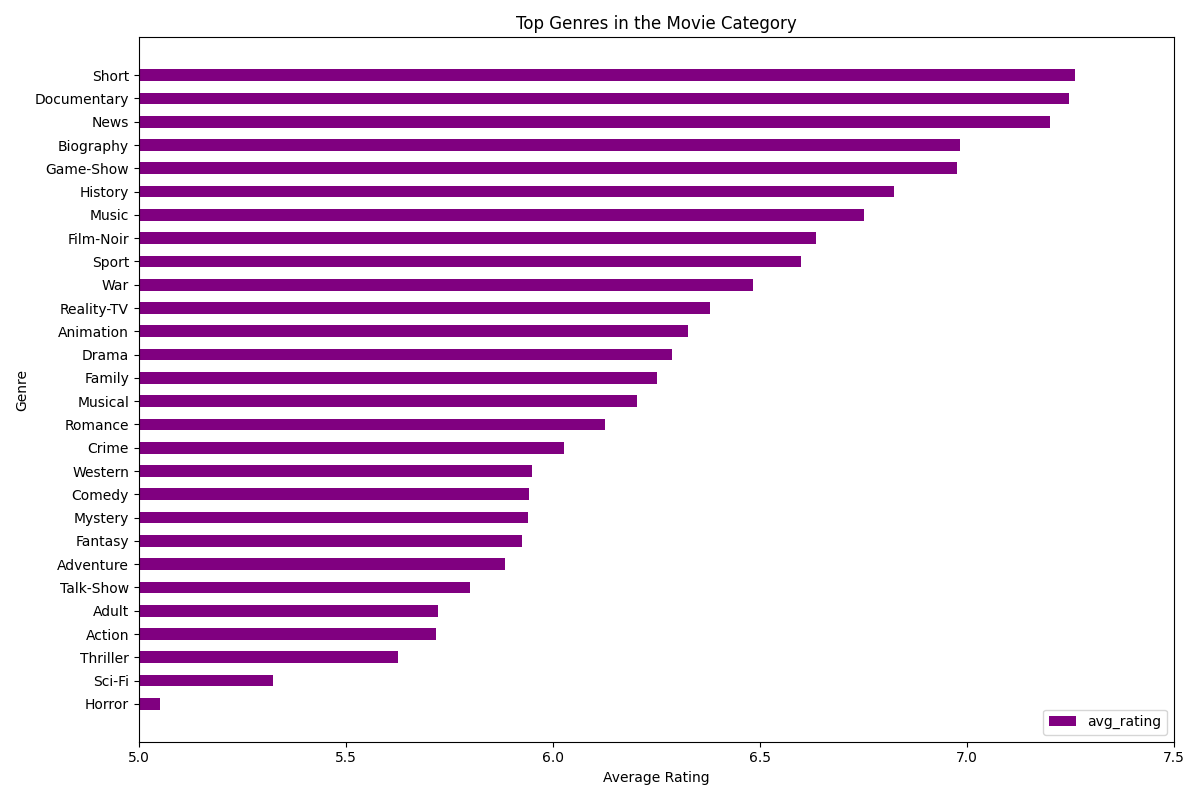

In [24]:
# Converting Spark DataFrame into a Pandas DataFrame
pd_sorted_average_ratings_per_genre = sorted_average_ratings_per_genre.toPandas()

# Plotting
plt.figure(figsize=(12, 8))
plt.barh(pd_sorted_average_ratings_per_genre['genre'], pd_sorted_average_ratings_per_genre['avg_rating'], color='purple', height=0.5)
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.title('Top Genres in the Movie Category')
plt.xlim(5.0, 7.5) 
plt.legend(['avg_rating'])
plt.gca().invert_yaxis()
plt.tight_layout()

# Show the plot
%matplot plt

## PART 3 - Analyzing Job Categories

## Total Unique Job Categories

**What is the total number of unique job categories?**

In [25]:
movie_actors.select('tconst', 'category').show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+---------------+
|   tconst|       category|
+---------+---------------+
|tt0000001|           self|
|tt0000001|       director|
|tt0000001|cinematographer|
|tt0000002|       director|
|tt0000002|       composer|
+---------+---------------+
only showing top 5 rows

In [26]:
movie_actors.select(countDistinct('category')).collect()[0][0]

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

12

**What are the unique job categories available?**

In [27]:
movie_actors.select('category').distinct().show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------+
|           category|
+-------------------+
|            actress|
|           producer|
|production_designer|
|             writer|
|              actor|
|    cinematographer|
|      archive_sound|
|    archive_footage|
|               self|
|             editor|
|           composer|
|           director|
+-------------------+

## Top Job Categories

Now let's find the top job categories in this dataset by rolling up categories.

### Counts of Titles / Job Category

The expected output should be:

| category | count |
|-------------|------------|
| a     | 15         |
| b     | 2          |
| c     | 45          |

Or something to that effect.

In [28]:
category_count = movie_actors.groupBy("category").count()
category_count.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------+-------+
|           category|  count|
+-------------------+-------+
|            actress|6325097|
|           producer|2197866|
|production_designer| 285924|
|             writer|4811596|
|              actor|8493701|
|    cinematographer|1300404|
|      archive_sound|   2143|
|    archive_footage| 209035|
|               self|6153089|
|             editor|1197669|
|           composer|1313187|
|           director|4179106|
+-------------------+-------+

### Bar Chart of Top Job Categories

With this data available, let us now build a barchart of the top 5 categories. 

**HINT**: don't forget about the matplotlib magic!

```
%matplot plt
```

In [29]:
sorted_category_count = category_count.sort(col('count').desc())
sorted_category_count.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------+-------+
|           category|  count|
+-------------------+-------+
|              actor|8493701|
|            actress|6325097|
|               self|6153089|
|             writer|4811596|
|           director|4179106|
|           producer|2197866|
|           composer|1313187|
|    cinematographer|1300404|
|             editor|1197669|
|production_designer| 285924|
|    archive_footage| 209035|
|      archive_sound|   2143|
+-------------------+-------+

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

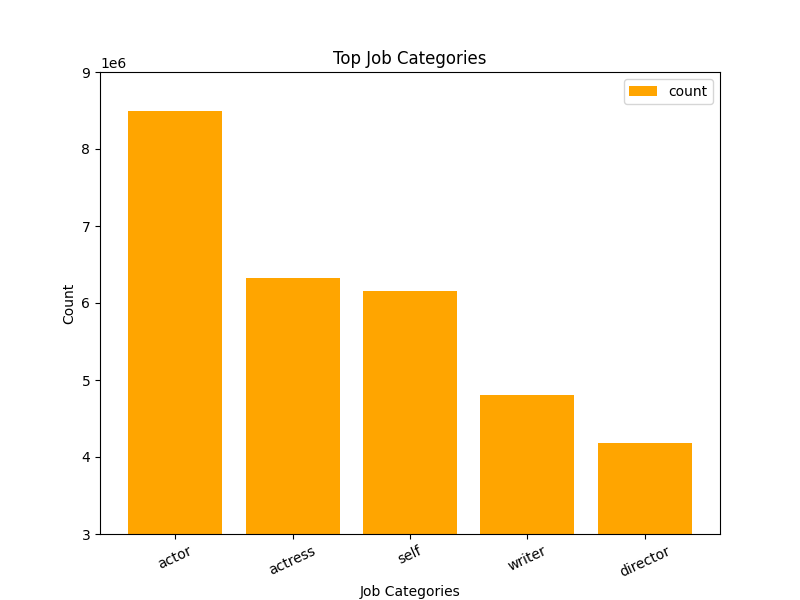

In [30]:
#Extracting only the Top 5
top5_categories = sorted_category_count.limit(5)

# Converting Spark DataFrame into a Pandas DataFrame
pd_top5_categories = top5_categories.toPandas()

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(pd_top5_categories['category'], pd_top5_categories['count'], color='orange')
plt.xlabel('Job Categories')
plt.ylabel('Count')
plt.title('Top Job Categories')
plt.legend(['count'])
plt.xticks(rotation=25)

# Y-axis from 3 to 9 
ax = plt.gca() 
ax.set_ylim(3e6, 9e6)

%matplot plt

# PART 4 - Answer to the following questions:

## 1) Find all the "movies" featuring "Johnny Depp" and "Helena Bonham Carter".

First join actors, genres, and movie actors on each other

In [31]:
#Renaming columns on which join is operated to avoid duplicates
movie_actors_renamed = movie_actors.withColumnRenamed('nconst', 'nconst_movie_actors') \
                                   .withColumnRenamed('tconst', 'tconst_movie_actors')

# Joining actors, genres, and movie_actors on each other
joined_df = actors.join(movie_actors_renamed, actors.nconst == movie_actors_renamed.nconst_movie_actors) \
                     .join(genres, genres.tconst == movie_actors_renamed.tconst_movie_actors)

# Filtering for Johnny Depp movies
depp_movies = joined_df.filter(
    (col('primaryName') == 'Johnny Depp') & (col('titleType') == 'movie')
)

# Filtering for Helena Bonham Carter movies
bonham_carter_movies = joined_df.filter(
    (col('primaryName') == 'Helena Bonham Carter') & (col('titleType') == 'movie')
)

# Joining the DataFrames to find movies where both actors were present
depp_bonham_carter_movies = depp_movies.join(
    bonham_carter_movies, 'tconst', 'inner'
)

# Showing the result
depp_bonham_carter_movies = depp_bonham_carter_movies.select(depp_movies.primaryTitle)
depp_bonham_carter_movies.show(truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------------------------------------------+
|primaryTitle                                  |
+----------------------------------------------+
|Dark Shadows                                  |
|Sweeney Todd: The Demon Barber of Fleet Street|
|Alice Through the Looking Glass               |
|Alice in Wonderland                           |
|Corpse Bride                                  |
|Charlie and the Chocolate Factory             |
+----------------------------------------------+

## 2) Find all the "movies" featuring "Brad Pitt" after 2010.

In [32]:
# Storing table for this Spark session
joined_df.createOrReplaceTempView('joined_df')

# Executing SQL query
joined_df_2 = spark.sql("""
SELECT primaryTitle, startYear
FROM joined_df 
WHERE titleType = 'movie'
AND primaryName = 'Brad Pitt'
AND startYear > 2010
ORDER BY startYear DESC
""")

# Showing the results
joined_df_2.show(truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------------------------------+---------+
|primaryTitle                     |startYear|
+---------------------------------+---------+
|Babylon                          |2021     |
|Irresistible                     |2020     |
|Kajillionaire                    |2020     |
|The King                         |2019     |
|Ad Astra                         |2019     |
|Once Upon a Time ... in Hollywood|2019     |
|Vice                             |2018     |
|War Machine                      |2017     |
|Voyage of Time: Life's Journey   |2016     |
|Allied                           |2016     |
|By the Sea                       |2015     |
|The Big Short                    |2015     |
|Hitting the Apex                 |2015     |
|Fury                             |2014     |
|World War Z                      |2013     |
|Kick-Ass 2                       |2013     |
|12 Years a Slave                 |2013     |
|Killing Them Softly              |2012     |
|The Tree of Life                 

## 3) What is the number of "movies" "acted" by "Zendaya" per year?

In [33]:
# Executing the SQL query
joined_df_3 = spark.sql("""
SELECT startYear, COUNT(*) as count
FROM joined_df 
WHERE titleType = 'movie'
AND primaryName LIKE '%Zendaya%'
AND startYear <> '\\\\N'
GROUP BY startYear
ORDER BY startYear DESC
""")

# Showing the results
joined_df_3.show(truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+-----+
|startYear|count|
+---------+-----+
|2020     |1    |
|2018     |2    |
|2017     |1    |
+---------+-----+

## 4) What are the "movies" by average rating greater than "9.7" and released in "2019"?

In [34]:
#Renaming columns on which join is operated to avoid duplicates
movie_ratings_renamed = movie_ratings.withColumnRenamed('tconst', 'tconst_movie_ratings')

# Joining genres and movie_ratings on each other
genres_rating = genres.join(movie_ratings_renamed, genres.tconst == movie_ratings_renamed.tconst_movie_ratings)

# Converting "averageRating" into a float for correct sorting
from pyspark.sql.types import FloatType
genres_rating = genres_rating.withColumn('averageRating', col('averageRating').cast(FloatType()))

# Storing table for this Spark session
genres_rating.createOrReplaceTempView('genres_rating')

# Execute the SQL query
joined_df_4 = spark.sql("""
SELECT PrimaryTitle, averageRating
FROM genres_rating 
WHERE titleType = 'movie'
AND startYear = 2019
AND averageRating > 9.7
ORDER BY averageRating DESC
""")

# Showing the results
joined_df_4.show(truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------------------------------------+-------------+
|PrimaryTitle                                     |averageRating|
+-------------------------------------------------+-------------+
|A Grunt's Life                                   |10.0         |
|Kirket                                           |10.0         |
|Our Scripted Life                                |10.0         |
|The Twilight Zone: A 60th Anniversary Celebration|10.0         |
|Bu Can Var Oldugu Sürece                         |10.0         |
|L'Enfant Terrible                                |10.0         |
|The Butcher Baronet                              |10.0         |
|A Medicine for the Mind                          |10.0         |
|Love in Kilnerry                                 |10.0         |
|Superhombre                                      |9.9          |
|Puritan: All of Life to The Glory of God         |9.9          |
|The Cardinal                                     |9.9          |
|Square On

## Extra Credit - Analysis of your choice

Try and analyze some interesting dimension to this data. You should specify the question in your Project2_Analysis.ipynb. 

You must join at least two datasets.


## 5) Which "actors" have acted in the greatest variety of "genres"?

In [35]:
# Executing SQL query
joined_df_5 = spark.sql("""
SELECT primaryName, COUNT(DISTINCT genres) AS distincttGenresCount
FROM joined_df 
WHERE titleType = 'movie'
AND category = 'actor'
GROUP BY primaryName
ORDER BY distincttGenresCount DESC
""")

# Showing the results
joined_df_5.show(truncate=False)


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------------------+--------------------+
|primaryName       |distincttGenresCount|
+------------------+--------------------+
|Eric Roberts      |93                  |
|Mohanlal          |69                  |
|Pran              |67                  |
|Luis Aguilar      |67                  |
|Rajesh Khanna     |64                  |
|Ashok Kumar       |64                  |
|Dharmendra        |64                  |
|Anupam Kher       |64                  |
|Amitabh Bachchan  |64                  |
|Christopher Lee   |63                  |
|Franco Nero       |63                  |
|Boris Karloff     |62                  |
|James Mason       |62                  |
|Malcolm McDowell  |61                  |
|Mammootty         |60                  |
|Prem Chopra       |60                  |
|Mithun Chakraborty|60                  |
|Michael Madsen    |59                  |
|Tom Sizemore      |59                  |
|Vincent Price     |59                  |
+------------------+--------------

## 6 ) Who are the "directors" with the highest "average ratings" among all the "movies" produced? To be considerend in the ranking, directors must have produced at least 5 movies

In [36]:
#Joining all the dataframes
all_joined = joined_df.join(movie_ratings_renamed, joined_df.tconst == movie_ratings_renamed.tconst_movie_ratings)


# Storing table for this Spark session
all_joined.createOrReplaceTempView('all_joined')


# Execute the SQL query
joined_df_6 = spark.sql("""
SELECT primaryName, CAST(format_number(AVG(averageRating), 2) AS FLOAT) AS AvgRating
FROM all_joined
WHERE titleType = 'movie'
AND category = 'director'
GROUP BY primaryName
HAVING COUNT(DISTINCT PrimaryTitle) > 5
ORDER BY AvgRating DESC
""")

# Showing the results
joined_df_6.show(truncate=False)


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------------------+---------+
|primaryName       |AvgRating|
+------------------+---------+
|Cathy Jones       |8.77     |
|Simran S Kaler    |8.7      |
|Tareque Masud     |8.57     |
|Jacques Holender  |8.52     |
|Carlos Nader      |8.5      |
|Scott Allen Nollen|8.45     |
|Zahir Raihan      |8.4      |
|Dick Carruthers   |8.39     |
|Mattias Löw       |8.37     |
|Anand Patwardhan  |8.31     |
|Barbara Junge     |8.31     |
|Dieter Köster     |8.3      |
|Federico Micali   |8.28     |
|Siddalingaiah     |8.27     |
|Barry Greenwald   |8.27     |
|Robin Lough       |8.27     |
|James E. Motluk   |8.27     |
|Goderdzi Chokheli |8.26     |
|Christopher Nolan |8.25     |
|Joe L. Roberts    |8.24     |
+------------------+---------+
only showing top 20 rows

## 7) Which "actor-director" pairs have worked together on the most "movies" from 1980?

In [ ]:
# Filtering for Director movies
director_movies = joined_df.filter((col('category') == "director") & (col("titleType") == "movie") & (col("startYear") > 1980))
# Renaming primaryName as directorName
director_movies = director_movies.withColumnRenamed('primaryName', 'directorName')

# Filtering for Director movies
actors_movies = joined_df.filter((col('category') == "actor") & (col("titleType") == "movie") & (col("startYear") > 1980))
# Renaming primaryName as actorName
actors_movies = actors_movies.withColumnRenamed('primaryName', 'actorName')

#Renaming columns on which join is operated to avoid duplicates
actors_movies_renamed = actors_movies.withColumnRenamed('tconst', 'tconst2')

# Joining the DataFrames on the 'tconst' column
collaborations = director_movies.join(actors_movies_renamed, director_movies.tconst == actors_movies_renamed.tconst2)

# Grouping by directorName and actorName, counting the collaborations
collaboration_counts = collaborations.groupBy("directorName", "actorName").count()

# Ordering by count in descending order
most_collaborations = collaboration_counts.orderBy(col("count").desc())

# Show the top pairs
most_collaborations.show(100)


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…